In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import seaborn as sns

## Milestone 4


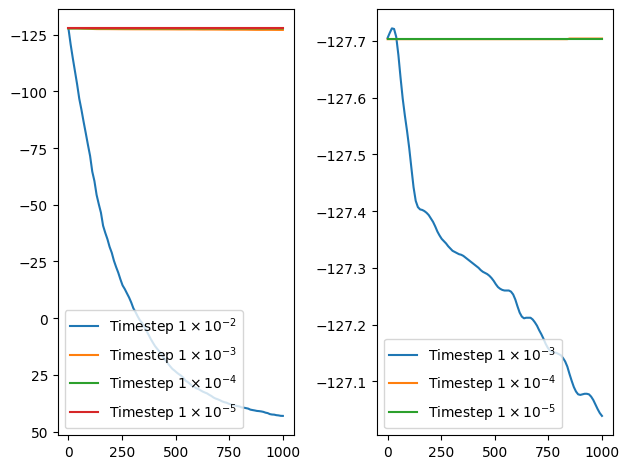

In [2]:
arr = np.loadtxt("ms4/energy_0")
# arr *= -1
lst1 = ['$1 \\times 10^{-2}$','$1\\times10^{-3}$','$1\\times10^{-4}$','$1\\times10^{-5}$']
t = np.linspace(0,1000,len(arr))
fig, ax = plt.subplots(1,2)
ax[0].plot(t,arr, label='Timestep '+lst1[0])
for i in range(1,4,1):
    arr2 = np.loadtxt("ms4/energy_"+str(i))
    ax[0].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[0].legend(loc="lower left")
for i in range(1,4,1):
    arr2 = np.loadtxt("ms4/energy_"+str(i))
    ax[1].plot(np.linspace( 0, 1000, len(arr2) ),arr2, label="Timestep "+lst1[i])
ax[1].legend(loc="lower left")
ax[0].invert_yaxis()
ax[1].invert_yaxis()
plt.tight_layout()
plt.show()

## Milestone 5 + 6


In [3]:
plt.rcParams.update({
    'font.size': 14,
    'lines.linewidth': 2,
})


data = pd.read_csv("ms5/data")
data = data.query('name.str.contains("/")')
data['range'] = [int(x.split('/')[-1]) for x in data['name']]
data['Benchmark'] = [x.split('/')[0] for x in data['name']]
data['range'] *= data['range']*data['range']


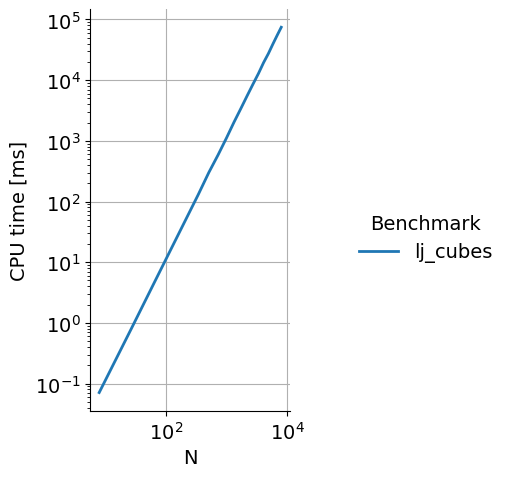

In [4]:
sns.relplot(data=data[0:19],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

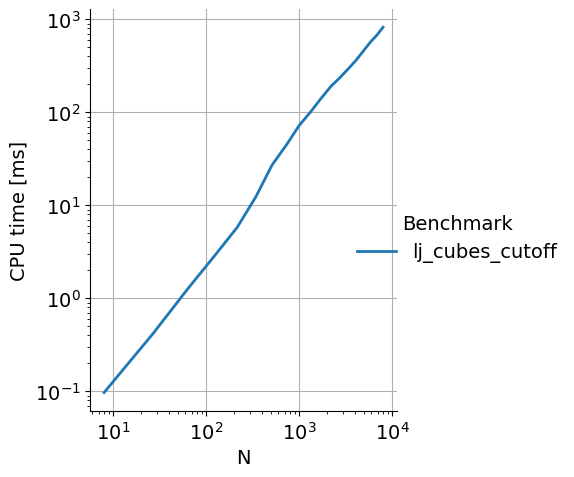

In [5]:
sns.relplot(data=data[19:],
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

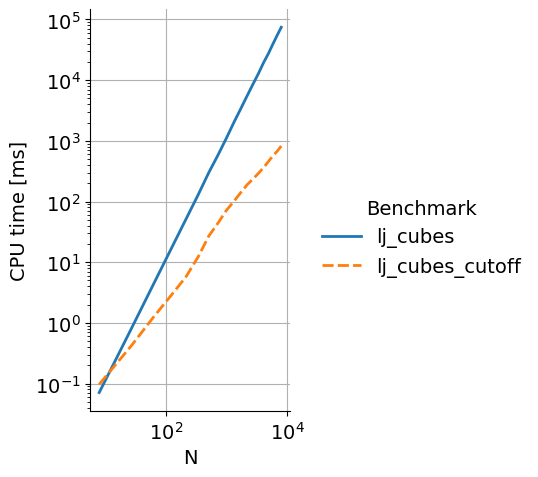

In [6]:
sns.relplot(data=data,
            x='range', y='cpu_time',
            style='Benchmark',
            hue='Benchmark', kind='line')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('N')
plt.ylabel('CPU time [ms]')

plt.grid()
plt.gca().set_aspect('equal')
plt.gcf().tight_layout()
plt.show()

## Milestone 7


984
984
151
75
47
32
23
17


ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

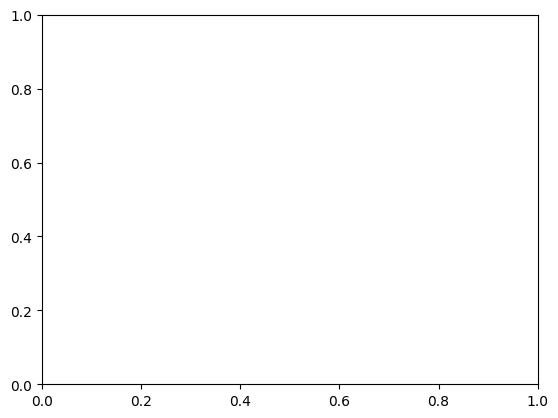

In [59]:
arr = np.fromfile("ms7/e_all_1", sep="\t")
arrs = [arr]
print(len(arr))
lst1 = ["1"]
for i in range(1,32,5):
    arr2 = np.fromfile("ms7/e_all_"+str(i), sep="\t")
    print(len(arr2))
    arrs = np.vstack([arr, arr2])
    lst1.append(str(i))
t = np.linspace(0,100,100)
for i in range(0,6):
    plt.plot(t,arr[i], label="timestep "+lst1[i])
plt.legend()
plt.show()
#print(arr)

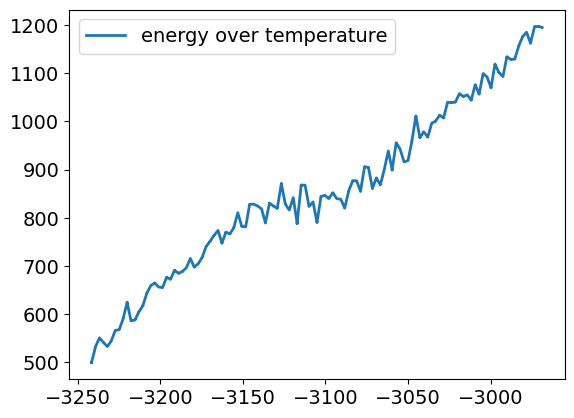

In [27]:
arr = np.fromfile("ms7/temp", sep="\n")
arr1 = np.fromfile("ms7/temp1", sep="\n")
ener = np.fromfile("ms7/energy", sep="\n")
ener1 = np.fromfile("ms7/energy1", sep="\n")
ener_all = np.concat((ener,ener1), axis=0)
temp_all = np.concat((arr, arr2), axis=0)
plt.plot(ener1,arr1, label="energy over temperature")
plt.legend()
plt.show()
#print(arr)

## Milestone 8


## Milestone 9


In [34]:
s = 15000/10
t = s / 100
print(s)
print(t)
print(s/t)

1500.0
15.0
100.0


In [50]:
s = np.linspace(1,10,10)
t = np.append(s,s, axis=new)
print(t)

NameError: name 'new' is not defined

In [9]:
s = np.loadtxt("ms4/energy_1")
print(s)

[-127.72  -127.815 -127.89  -127.889 -127.737 -127.411 -127.    -126.622
 -126.316 -126.041 -125.731 -125.362 -125.007 -124.765 -124.65  -124.614
 -124.604 -124.585 -124.549 -124.5   -124.444 -124.375 -124.289 -124.199
 -124.121 -124.066 -124.022 -123.978 -123.93  -123.883 -123.845 -123.82
 -123.802 -123.788 -123.772 -123.751 -123.727 -123.7   -123.67  -123.639
 -123.607 -123.575 -123.541 -123.508 -123.479 -123.454 -123.429 -123.397
 -123.353 -123.299 -123.244 -123.195 -123.159 -123.139 -123.132 -123.133
 -123.131 -123.113 -123.062 -122.966 -122.837 -122.714 -122.637 -122.608
 -122.607 -122.614 -122.615 -122.603 -122.572 -122.517 -122.441 -122.348
 -122.242 -122.138 -122.056 -122.005 -121.979 -121.969 -121.96  -121.944
 -121.92  -121.888 -121.845 -121.779 -121.68  -121.552 -121.414 -121.291
 -121.204 -121.162 -121.154 -121.161 -121.17  -121.167 -121.145 -121.102
 -121.04  -120.967 -120.892 -120.821]
